In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import scipy as scp
import scipy.linalg
from scipy.sparse.linalg import inv
%matplotlib notebook


### Theory and Derivation

In [224]:
c = 1
dt = 1e-2
dx = 1e-2

X_0 = 0
X_end = 1
tEnd = 10
M = int((X_end - X_0)/dx)
N = int(tEnd/dt)
X = np.linspace(X_0, X_end, M)
sigma = 0.02

F = np.ones(M)*np.exp((-(X-np.random.random())**2)/(2*(sigma)**2))
F_dot = np.ones(X.shape)*0
F_dot[0] = 0
F_dot[-1] = 0
F[0] = 0
F[-1] = 0

FData = np.zeros((N,M))


## Note

Note that for an stable solution we should have

$$ (c\Delta t / \Delta x) \leq 1 $$ 

in case of the equality, we will have the exact solution (Giordano Computational Physics book)

In [225]:
N

1000

<IPython.core.display.Javascript object>


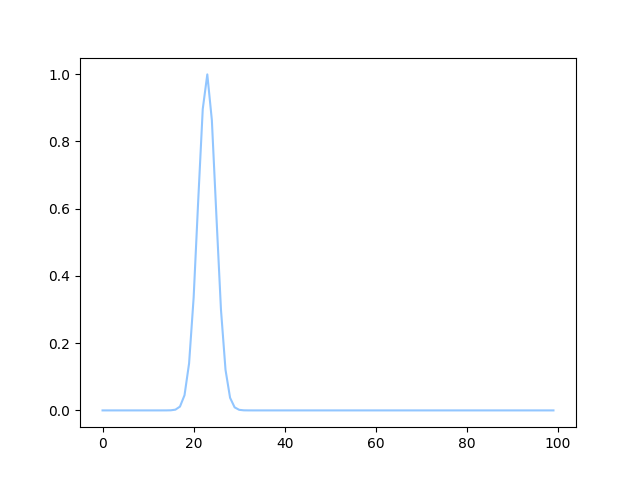

In [226]:
plt.plot(F)

In [213]:
Diag = np.ones(M)*(-2)
Diag[0] = 1
Diag[-1] = 1

upDiag = np.ones(M)
upDiag[1] = 0

lowDiag = np.ones(M)
lowDiag[-2] = 0

Mat = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = Mat.toarray()

I = scp.sparse.eye(M)

In [214]:
F_pre = (0.5*Mat + 1*I).dot(F) - F_dot*dt
FData[0,:] = F
FData[1,:] = F_pre
F = np.copy(F_pre)
F[0] = 0
F[-1] = 0
F_pre = np.copy(FData[0,:])

In [215]:
for t in range(2, N):
    F = (Mat + 2*I).dot(F) - F_pre
    FData[t,:] = F
    F_pre = FData[t-1,:]

<IPython.core.display.Javascript object>


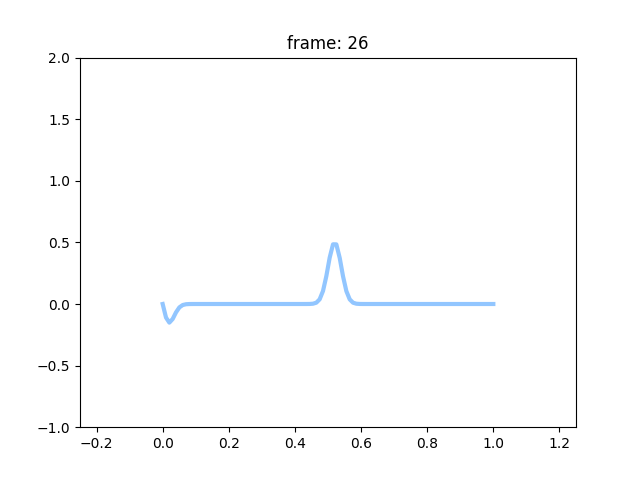

In [219]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.25,1.25])
    ax.set_ylim([-1,2])
    return line,
def animate(i):
    ydata = FData[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=50, blit=True)


<IPython.core.display.Javascript object>


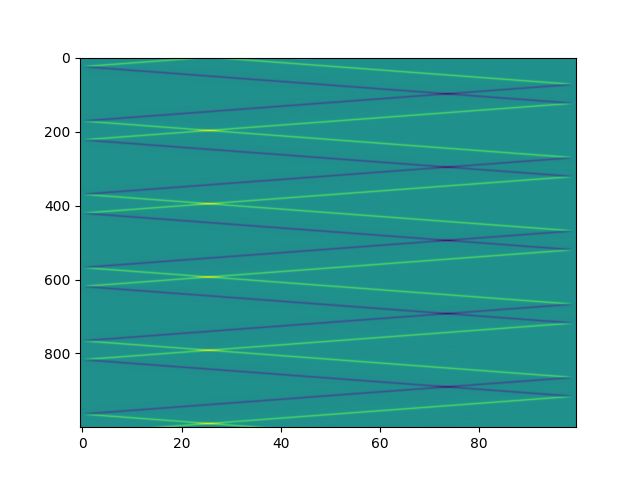

In [220]:
plt.imshow(FData, aspect='auto')

## Instability Tests

### Coeff less than 1

In [270]:
c = 0.6
dt = 1e-2
dx = 1e-2

X_0 = 0
X_end = 1
tEnd = 10
M = int((X_end - X_0)/dx)
N = int(tEnd/dt)
X = np.linspace(X_0, X_end, M)
sigma = 0.02

F = np.ones(M)*np.exp((-(X-np.random.random())**2)/(2*(sigma)**2))
F_dot = np.ones(X.shape)*0
F_dot[0] = 0
F_dot[-1] = 0
F[0] = 0
F[-1] = 0

FData = np.zeros((N,M))

In [271]:
Diag = np.ones(M)*(-2)
Diag[0] = 1
Diag[-1] = 1

upDiag = np.ones(M)
upDiag[1] = 0

lowDiag = np.ones(M)
lowDiag[-2] = 0

Mat = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = Mat.toarray()

I = scp.sparse.eye(M)

In [272]:
F_pre = (0.5*(c*dt/dx)**2*Mat + 1*I).dot(F) - F_dot*dt
FData[0,:] = F
FData[1,:] = F_pre
F = np.copy(F_pre)
F[0] = 0
F[-1] = 0
F_pre = np.copy(FData[0,:])

In [273]:
for t in range(2, N):
    F = ((c*dt/dx)**2*Mat + 2*I).dot(F) - F_pre
    FData[t,:] = F
    F_pre = FData[t-1,:]

<IPython.core.display.Javascript object>


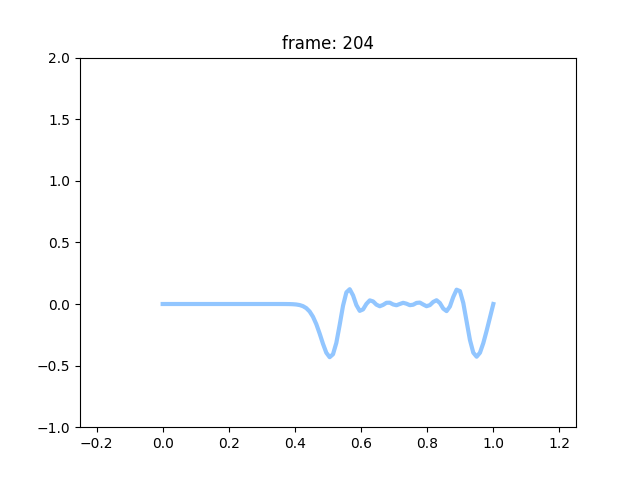

In [274]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.25,1.25])
    ax.set_ylim([-1,2])
    return line,
def animate(i):
    ydata = FData[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=50, blit=True)


<IPython.core.display.Javascript object>


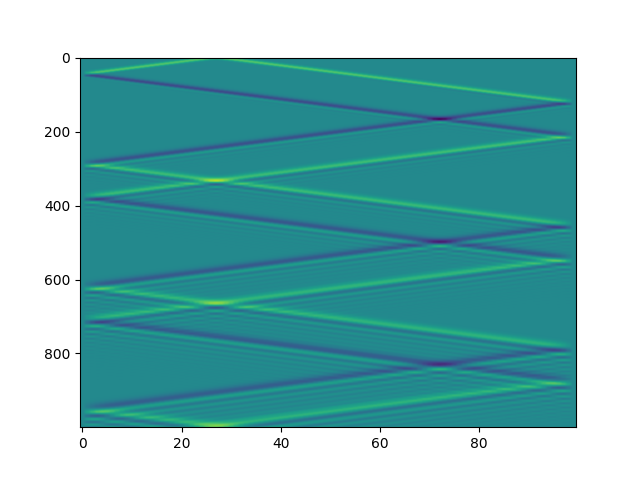

In [275]:
plt.imshow(FData, aspect='auto')

### Coeff bigger than 1

In [286]:
c = 1.01
dt = 1e-2
dx = 1e-2

X_0 = 0
X_end = 1
tEnd = 10
M = int((X_end - X_0)/dx)
N = int(tEnd/dt)
X = np.linspace(X_0, X_end, M)
sigma = 0.02

F = np.ones(M)*np.exp((-(X-np.random.random())**2)/(2*(sigma)**2))
F_dot = np.ones(X.shape)*0
F_dot[0] = 0
F_dot[-1] = 0
F[0] = 0
F[-1] = 0

FData = np.zeros((N,M))

In [287]:
Diag = np.ones(M)*(-2)
Diag[0] = 1
Diag[-1] = 1

upDiag = np.ones(M)
upDiag[1] = 0

lowDiag = np.ones(M)
lowDiag[-2] = 0

Mat = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = Mat.toarray()

I = scp.sparse.eye(M)

In [288]:
F_pre = (0.5*(c*dt/dx)**2*Mat + 1*I).dot(F) - F_dot*dt
FData[0,:] = F
FData[1,:] = F_pre
F = np.copy(F_pre)
F[0] = 0
F[-1] = 0
F_pre = np.copy(FData[0,:])

In [289]:
for t in range(2, N):
    F = ((c*dt/dx)**2*Mat + 2*I).dot(F) - F_pre
    FData[t,:] = F
    F_pre = FData[t-1,:]

<IPython.core.display.Javascript object>


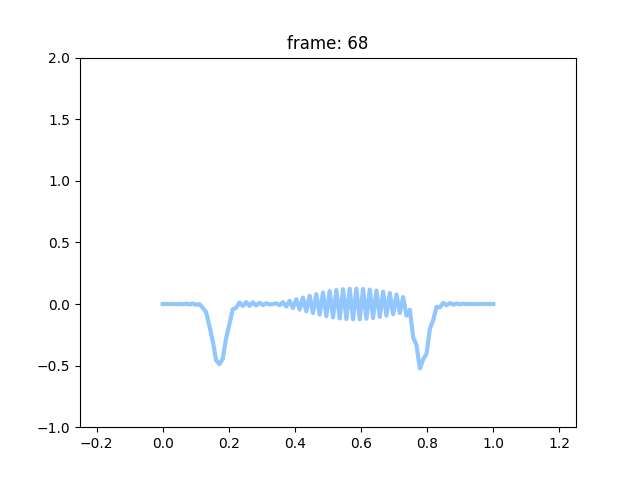

In [290]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.25,1.25])
    ax.set_ylim([-1,2])
    return line,
def animate(i):
    ydata = FData[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=50, blit=True)
